1. Relation Between Product Price and Orders 
1. State Wise Purchasing Power
2. Product Combination most Bought
3. Highest Sales Month
4. Time When Product Are most Bought
5. Date when a particular product is bought
6. 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [36]:
os.listdir()

['.ipynb_checkpoints',
 'Pandas-Data-Science-Tasks',
 'Analysis.ipynb',
 'plot1.png']

In [37]:
all_data = pd.DataFrame()
for x,y,z in os.walk('./Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'):
    for val in z:
        filepath = x + val
        data = pd.read_csv(filepath)
        all_data = pd.concat([all_data,data])

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [42]:
all_data.dropna(how='all',inplace=True)

In [44]:
all_data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 13621
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
all_data = all_data[all_data['Order ID'] != 'Order ID']

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [9]:
all_data.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950.000000,185950.000000,185950,185950
unique,178437,19,NaN,NaN,142395,140787
top,160873,USB-C Charging Cable,NaN,NaN,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,NaN,NaN,8,9
first,NaN,NaN,NaN,NaN,2019-01-01 03:07:00,NaN
last,NaN,NaN,NaN,NaN,2020-01-01 05:13:00,NaN
mean,NaN,NaN,1.124383,184.399735,NaN,NaN
std,NaN,NaN,0.442793,332.731330,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN


In [10]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
all_data.dropna(inplace=True)

In [12]:
# Price Wise Distribution of the product and the number of times it is sold to a customers
products = all_data.groupby('Price Each')['Product'].value_counts().sort_values(ascending=False)

In [13]:
y = []
x = []
for val in products.index:
#     print(val)
    y.append(val[0])
    x.append(val[1])
#     break


In [14]:
products

Price Each  Product                   
11.95       USB-C Charging Cable          21903
14.95       Lightning Charging Cable      21658
2.99        AAA Batteries (4-pack)        20641
3.84        AA Batteries (4-pack)         20577
11.99       Wired Headphones              18882
150.00      Apple Airpods Headphones      15549
99.99       Bose SoundSport Headphones    13325
149.99      27in FHD Monitor               7507
700.00      iPhone                         6842
389.99      27in 4K Gaming Monitor         6230
379.99      34in Ultrawide Monitor         6181
600.00      Google Phone                   5525
300.00      Flatscreen TV                  4800
1700.00     Macbook Pro Laptop             4724
999.99      ThinkPad Laptop                4128
109.99      20in Monitor                   4101
400.00      Vareebadd Phone                2065
600.00      LG Washing Machine              666
            LG Dryer                        646
Name: Product, dtype: int64

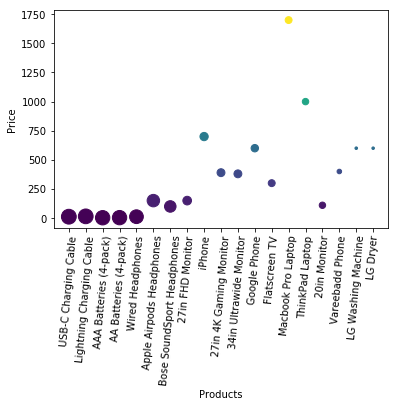

In [15]:
'''
Here is the visvulization of the Products how there Orders vs the Price of the Prouct on Graphical Representation . 
1. Lower Price Products are bout a lot compared to higher value products .
2. Most Popular Products in Higher Range are iPhone, Google Phone, MackBook,ThinkPad
3. 27 inch monitor are more prefered compared to 20 inch which has slight different price range
'''
plt.scatter(x,y,s=products.values/100,c=y)
plt.xticks(rotation=85)
plt.xlabel('Products')
plt.ylabel('Price')
# plt.legend(x)
plt.show()

Get the Zip Code and City in different colum . Add Total Sales i.e Quantity Ordered * Price Each 

In [16]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1])
all_data['ZipCode'] = all_data['Purchase Address'].str[-6:]
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [17]:
city_sales = all_data.groupby('City')['Total Sales'].sum().sort_values().astype(int)
city_sales

City
 Austin           1819581
 Portland         2320490
 Seattle          2747755
 Dallas           2767975
 Atlanta          2795498
 Boston           3661642
 New York City    4664317
 Los Angeles      5452570
 San Francisco    8262203
Name: Total Sales, dtype: int64

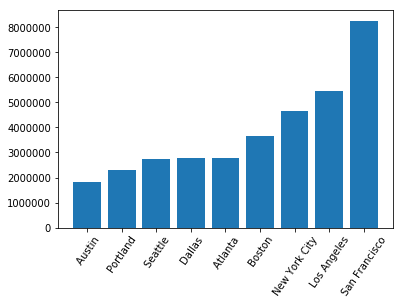

In [18]:
plt.bar(city_sales.index,city_sales.values)
plt.xticks(rotation=55)
plt.show()

Is there any variation in gettig expensive products and the time of shopping of the products.

In [19]:
all_data['Hour'] = all_data['Order Date'].dt.hour

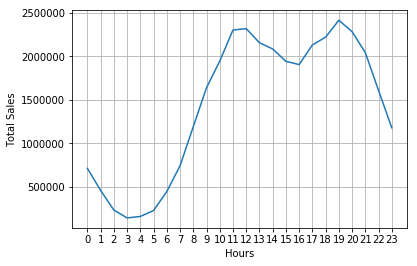

The Max Peak of sales occured at 19 Hr with Sales at 2412938.5400000713


In [20]:
hour_sales = all_data.groupby('Hour')['Total Sales'].sum()
plt.plot(hour_sales.index,hour_sales.values)
plt.xticks(hour_sales.index)
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.grid()
plt.show()
print('The Max Peak of sales occured at {} Hr with Sales at {}'.format(hour_sales.idxmax(),hour_sales.max()))

In [21]:
test = pd.DataFrame({'Order ID':[1,1,223,5,223,5,5],'Product':['apple','orange','apple','apple','orange','banana','pinaple']})

In [22]:
p = all_data.iloc[:1000]

In [23]:
test = all_data.groupby('Order ID')['Product'].apply(lambda x: list(x))

In [24]:
# test.tolist()

In [25]:
from collections import Counter
from itertools import combinations

d  = Counter()
for sub in test.tolist():
    if len(test.tolist()) < 2:
        continue
    sub.sort()
    for comb in combinations(sub,2):
        d[comb] += 1


In [26]:
# print(d.most_common())

In [27]:
lst = pd.DataFrame({'Combination':[x for x in d.keys()],'Counts':[x for x in d.values()]})

In [28]:
lst.sort_values('Counts',ascending=False).head()

,Combination,Counts
11,"(Lightning Charging Cable, iPhone)",1015
3,"(Google Phone, USB-C Charging Cable)",999
8,"(Wired Headphones, iPhone)",462
17,"(Google Phone, Wired Headphones)",423
5,"(Apple Airpods Headphones, iPhone)",373


The top most combination are 
Lightning Charging Cable with Iphone - 1015
Google Phone with USB C Charging Cable - 999
It can be concluded that most Customers take Charging Cable with the phones 

In [29]:
all_data['Date'] = all_data['Order Date'].dt.month

'\n    From the above graph it shows some intresting facts that the sales of product increase from 1 - 4 Months then \n    fall from 5 - 9 Month then increase back again \n'

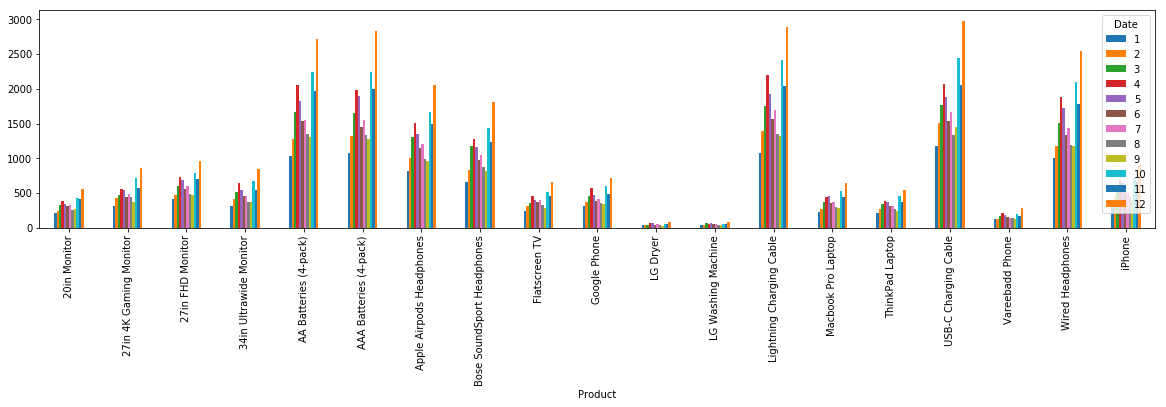

In [30]:
all_data.groupby('Product')['Date'].value_counts().unstack().plot(kind='bar',figsize=(20,4))
'''
    From the above graph it shows some intresting facts that the sales of product increase from 1 - 4 Months then 
    fall from 5 - 9 Month then increase back again 
'''